### Detecção por Inteligência Artificial de Barras Quebradas em Rotores de Motores de Indução Trifásicos.

Objetivo do projeto - 
Baseado em conceitos de Data Science e IA desenvolver uma ferramenta de Manutenção Preditiva dedicada a diagnosticar barras quebradas em rotores de motores de indução trifásicos.

Link para o dataset:  https://ieee-dataport.org/open-access/experimental-database-detecting-and-diagnosing-rotor-broken-bar-three-phase-induction


Introdução:

O conjunto de dados contém sinais elétricos e mecânicos de experimentos em motores de indução trifásicos. Os ensaios experimentais foram realizados para diferentes cargas mecânicas no eixo do motor de indução e diferentes severidades de defeitos de barra quebrada no rotor do motor, incluindo dados referentes ao rotor sem defeitos. Dez repetições foram realizadas para cada condição experimental.
 
A bancada experimental consiste em um motor de indução trifásico acoplado a uma máquina de corrente contínua, que funciona como um gerador simulando o torque de carga, conectado por um eixo contendo uma chave de torque rotativa.

- Motor de Indução: 1cv, 220V/380V, 3.02A/1.75A, 4 pólos, 60 Hz, com o torque nominal de 4.1 Nm e uma velocidade nominal de 1715 rpm. O rotor é do tipo gaiola de esquilo composto por 34 barras.

- Torque de carga: é ajustado variando a tensão do enrolamento de campo do gerador de corrente contínua. Um variador de tensão monofásico com um retificador de ponte completa filtrado é usado para esse propósito. Um motor de indução foi testado em 12,5, 25, 37,5, 50, 62,5, 75, 87,5 e 100% da carga total.

- Barra do rotor quebrada: para simular a falha no rotor do motor de indução trifásico, foi necessário perfurar o rotor. As barras de rotor de ruptura são geralmente adjacentes à primeira barra de rotor, 4 rotores foram testados, o primeiro com uma barra de quebra, o segundo com duas barras quebradas adjacentes e assim por diante o rotor contendo quatro barras quebradas adjacentes.

Condição de monitoramento:

Todos os sinais foram amostrados ao mesmo tempo por 18 segundos para cada condição de carregamento e dez repetições foram realizadas do transiente para o estado estacionário do motor de indução.

- Sinais mecânicos: foram utilizados cinco acelerômetros axiais simultaneamente, com sensibilidade de 10 mV/mm/s, faixa de frequência de 5 a 2.000 Hz e caixa de aço inoxidável, permitindo medições de vibração tanto na extremidade motriz (DE) quanto na extremidade não motriz (NDE) laterais do motor, axial ou radialmente, nas direções horizontal ou vertical.

- Sinais elétricos: as correntes foram medidas por sondas de corrente alternada, que correspondem a medidores de precisão, com capacidade de até 50ARMS, com tensão de saída de 10 mV/A, correspondente ao modelo Yokogawa 96033. As tensões foram medidas diretamente nos terminais de indução usando pontos de tensão do osciloscópio e do fabricante Yokogawa.

Visão geral do dataset:

-         Tensão trifásica

-         Corrente trifásica

-         Cinco sinais de vibração

Referências:

O banco de dados foi adquirido no Laboratório de Automação Inteligente de Processos e Sistemas e no Laboratório de Controle Inteligente de Máquinas Elétricas da Escola de Engenharia de São Carlos da Universidade de São Paulo (USP), Brasil.
            
Aline Elly Treml, Rogério Andrade Flauzino, Marcelo Suetake, Narco Afonso Ravazzoli Maciejewski, September 15, 2020, "Experimental database for detecting and diagnosing rotor broken bar in a three-phase induction motor.", IEEE Dataport, doi: https://dx.doi.org/10.21227/fmnm-bn95.

### Quarta Etapa - Implementando a FFT e o janelamento no dataset

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [2]:
# Carregando os dados
normal0 = pd.read_csv('arquivos_csv_normal/normal_torque40_0.csv', index_col=0)
normal0 = normal0.Ia[114000:]

#tamanho total do dataset
len(normal0)

C:\Users\linco\anaconda3\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


887000

In [3]:
# A taxa de amostragem empregada consiste na quantidade de pontos encontrados anteriormente multiplicado pela 
# frequência de rede elétrica (60Hz)
sample_rate = 49680
# tempo equivalente para todo o dataset no regime permanente de operação.
len(normal0) / sample_rate

17.85426731078905

In [4]:
#Próximo passo é definir a janela de estudo. Para cada amostra, define-se a análise da FFT em 10 ciclos.

#tempo de cada janela
t = (1/60)*10

#Número total de pontos
N = int(t * sample_rate)
N

8280

In [5]:
time = np.linspace(0, t, N)

<AxesSubplot:>

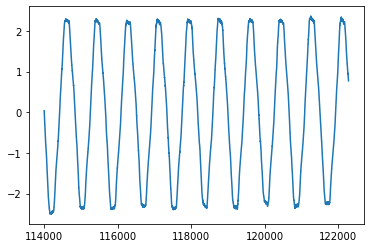

In [6]:
normal0[0:N].plot()

In [7]:
frequency = np.linspace (0.0, sample_rate/2, int (N/2))

In [8]:
# aplicando a FFT no dataset com motor sem barra quebrada, com o torque de 40 Nm.
yf = rfft(normal0[0:N].values)
xf = rfftfreq(N, 1 / sample_rate)

In [9]:
xf[0:10]

array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54.])

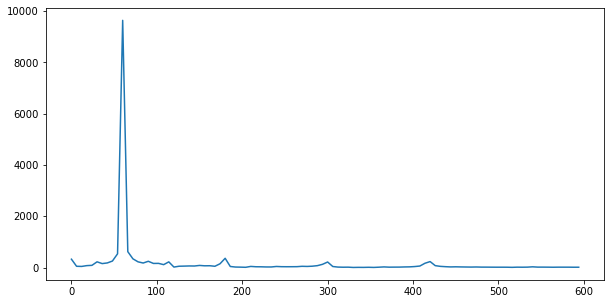

In [10]:
# plot após a FFT
plt.figure(figsize=(10,5))
plt.plot(xf[0:100], np.abs(yf)[0:100])
plt.show()

C:\Users\linco\anaconda3\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<AxesSubplot:>

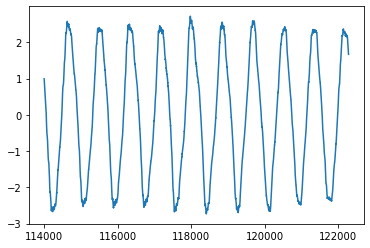

In [11]:
# Carregando o dataset com quatro barras quebradas e torque de 40 Nm.
normal_4b_t40 = pd.read_csv('arquivos_csv_barra4/barra_4_torque40_0.csv', index_col=0)
normal_4b_t40 = normal_4b_t40.Ia[114000:]

normal_4b_t40[0:N].plot()

In [12]:
# Aplicando a FFT
yf_4b_t40 = rfft(normal_4b_t40[0:N].values)
xf_4b_t40 = rfftfreq(N, 1 / sample_rate)

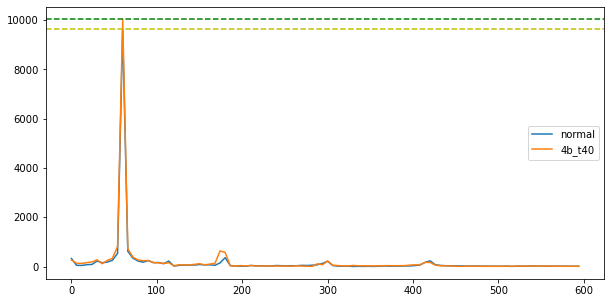

In [13]:
# Plot e comparação das condições normal e 4 barras.
plt.figure(figsize=(10,5))
plt.plot(xf[0:100], np.abs(yf)[0:100], label='normal')
plt.plot(xf_4b_t40[0:100], np.abs(yf_4b_t40)[0:100], label='4b_t40')
plt.axhline(y = np.abs(yf_4b_t40)[10], color='g', linestyle='--')
plt.axhline(y = np.abs(yf)[10], color='y', linestyle='--')
plt.legend()
plt.show()

In [14]:
xf_4b_t40[0:11]

array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.])

In [15]:
np.abs(yf_4b_t40)[10]

10035.010176944103

Text(0.5, 0, 'Sample')

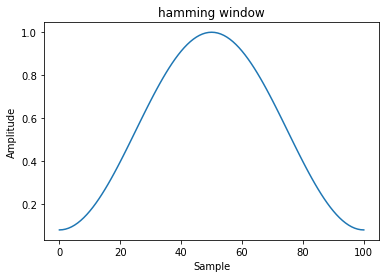

In [16]:
#implementando o janelamento
from scipy import signal
window = signal.windows.hamming(101)
plt.plot(window)
plt.title("hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

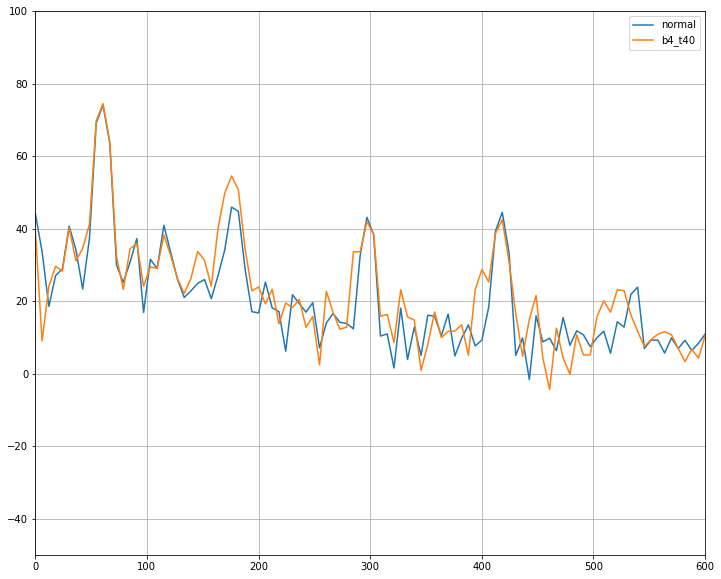

In [17]:
# FFT com o janelamento 

from scipy.signal import get_window

plt.figure(figsize = (12, 10))
n = 8192
w = np.fft.rfft(normal0[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='normal')

w = np.fft.rfft(normal_4b_t40[0:N].values * get_window('hamming', len(time)), n=n)
freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4_t40')

plt.legend()

plt.ylim(-50, 100)
plt.xlim(0, 600)
plt.grid()

<Figure size 864x720 with 0 Axes>

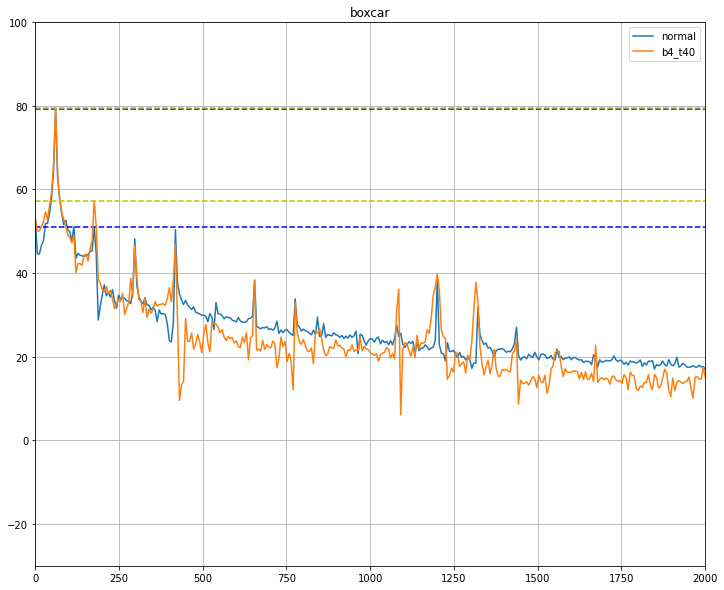

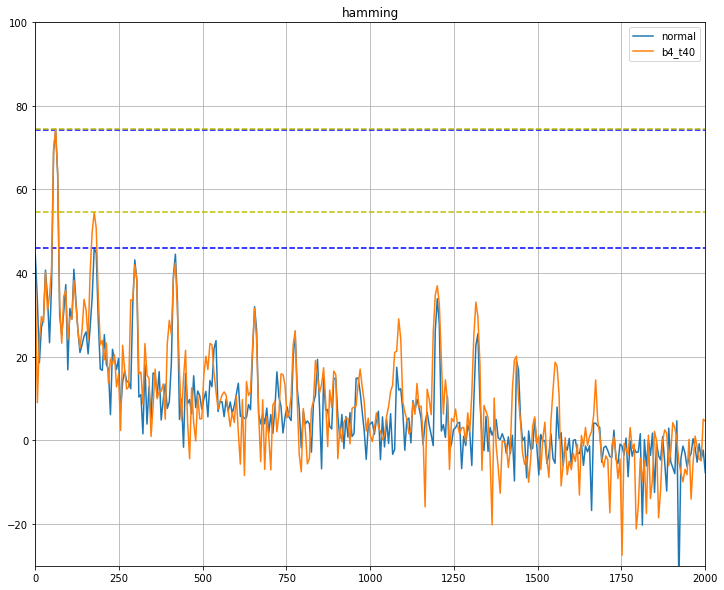

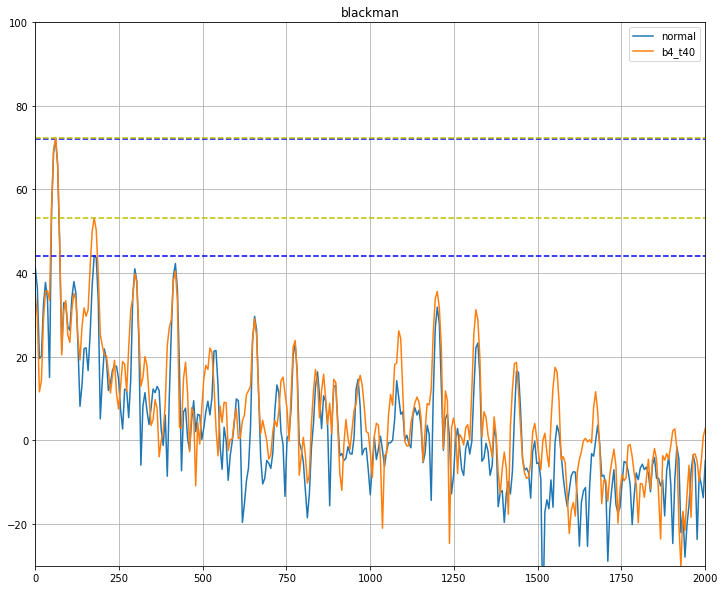

In [18]:
# Comparando os tipos de janemlamento
plt.figure(figsize = (12, 10))
for window in ['boxcar', 'hamming', 'blackman']:
    plt.figure(figsize = (12, 10))
    n = 8192
    w = np.fft.rfft(normal0[0:N].values * get_window(window, len(time)), n=n)
    freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label='normal')
    
    plt.axhline(y = 20*np.log10(np.abs(w))[10], color='b', linestyle='--')
    plt.axhline(y = 20*np.log10(np.abs(w))[29], color='b', linestyle='--')

    w = np.fft.rfft(normal_4b_t40[0:N].values * get_window(window, len(time)), n=n)
    freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label='b4_t40')
    
    plt.axhline(y = 20*np.log10(np.abs(w))[10], color='y', linestyle='--')
    plt.axhline(y = 20*np.log10(np.abs(w))[29], color='y', linestyle='--')

    plt.title(window)
    plt.ylim(-50, 100)
    plt.xlim(0, 600)
    plt.grid()
    plt.ylim(-30, 100)
    plt.xlim(0, 2000)
    plt.legend()

In [19]:
len(np.abs(w))

4097

In [20]:
output_fft = pd.DataFrame(np.abs(w))
output_fft

,0
0,54.392913
1,29.039122
2,3.800263
3,5.161890
4,27.469239
...,...
4092,0.220045
4093,0.581243
4094,0.693395
4095,0.498597


In [21]:
normal = pd.read_csv('arquivos_csv_normal/normal_torque40_0.csv', index_col=0)

C:\Users\linco\anaconda3\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [22]:
sample_rate = 49680

#Próximo passo é definir a janela de estudo. Para cada amostra, define-se a análise da FFT em 10 ciclos.

#tempo de cada janela
t = (1/60)*10

#Número total de pontos
N = int(t * sample_rate)
N

8280

### Transformando os dados a partir da FFT com Janelamento em um dataset 

In [23]:
output_fft = 0
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    normal0 = normal[ii][114000:]
    for i in range(int(len(normal0)/N)):
        print("dataset", ii, i*N, (i+1)*N)
        n = 8192
        w = np.fft.rfft(normal0[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        if type(output_fft) == int:
            output_fft = pd.DataFrame(np.abs(w), columns=['normal_40'])
            version+=1
        else:
            output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['normal_40'])], axis=1)
            version+=1

dataset Ia 0 8280
dataset Ia 8280 16560
dataset Ia 16560 24840
dataset Ia 24840 33120
dataset Ia 33120 41400
dataset Ia 41400 49680
dataset Ia 49680 57960
dataset Ia 57960 66240
dataset Ia 66240 74520
dataset Ia 74520 82800
dataset Ia 82800 91080
dataset Ia 91080 99360
dataset Ia 99360 107640
dataset Ia 107640 115920
dataset Ia 115920 124200
dataset Ia 124200 132480
dataset Ia 132480 140760
dataset Ia 140760 149040
dataset Ia 149040 157320
dataset Ia 157320 165600
dataset Ia 165600 173880
dataset Ia 173880 182160
dataset Ia 182160 190440
dataset Ia 190440 198720
dataset Ia 198720 207000
dataset Ia 207000 215280
dataset Ia 215280 223560
dataset Ia 223560 231840
dataset Ia 231840 240120
dataset Ia 240120 248400
dataset Ia 248400 256680
dataset Ia 256680 264960
dataset Ia 264960 273240
dataset Ia 273240 281520
dataset Ia 281520 289800
dataset Ia 289800 298080
dataset Ia 298080 306360
dataset Ia 306360 314640
dataset Ia 314640 322920
dataset Ia 322920 331200
dataset Ia 331200 339480
datase

In [24]:
normal_10 = pd.read_csv('arquivos_csv_normal/normal_torque10_0.csv', index_col=0)
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    normal0 = normal_10[ii][114000:]
    for i in range(int(len(normal0)/N)):
        n = 8192
        w = np.fft.rfft(normal0[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        if type(output_fft) == int:
            output_fft = pd.DataFrame(np.abs(w), columns=['normal_10'])
            version+=1
        else:
            output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['normal_10'])], axis=1)
            version+=1
            
normal_20 = pd.read_csv('arquivos_csv_normal/normal_torque20_0.csv', index_col=0)
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    normal0 = normal_20[ii][114000:]
    for i in range(int(len(normal0)/N)):
        n = 8192
        w = np.fft.rfft(normal0[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        if type(output_fft) == int:
            output_fft = pd.DataFrame(np.abs(w), columns=['normal_40'])
            version+=1
        else:
            output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['normal_20'])], axis=1)
            version+=1
            
normal_30 = pd.read_csv('arquivos_csv_normal/normal_torque30_0.csv', index_col=0)
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    normal0 = normal_30[ii][114000:]
    for i in range(int(len(normal0)/N)):
        n = 8192
        w = np.fft.rfft(normal0[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        if type(output_fft) == int:
            output_fft = pd.DataFrame(np.abs(w), columns=['normal_40'])
            version+=1
        else:
            output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['normal_30'])], axis=1)
            version+=1

In [25]:
# Dataset final gerado à partir da FFT e janelamento para todas as condições do motor

output_fft

,normal_40,normal_40,normal_40,normal_40,normal_40,normal_40,normal_40,normal_40,normal_40,normal_40,...,normal_30,normal_30,normal_30,normal_30,normal_30,normal_30,normal_30,normal_30,normal_30,normal_30
0,162.651719,111.890758,80.329945,73.749030,33.388366,36.921297,10.506350,10.297086,4.185318,36.545688,...,15.388247,25.973400,25.317155,3.716365,5.238125,2.472219,9.090128,23.791511,23.868051,8.237465
1,48.010772,20.807505,3.952045,5.456835,18.078511,5.721913,8.728757,2.196216,15.513728,11.634865,...,24.530755,18.204189,9.458292,8.366866,0.914660,13.475029,20.040164,19.056637,21.322611,23.547106
2,8.462801,27.757544,14.625267,28.308248,20.438002,19.707263,5.949917,6.085099,13.802087,19.911777,...,22.214952,21.488750,17.150349,7.456293,5.164643,11.876387,17.286313,21.851825,22.952086,19.798761
3,22.542696,13.776668,32.743105,25.069577,25.333624,16.589387,10.332159,8.552027,12.809001,20.225171,...,22.169732,21.167604,16.209896,7.093884,7.372281,13.950647,20.190554,21.643906,22.751465,18.679013
4,27.858295,28.180740,54.785211,56.430864,40.049066,19.065790,30.188894,41.295125,25.788139,5.402709,...,31.799767,15.650965,2.604105,18.098573,27.141808,27.347144,20.975441,6.423678,13.145800,28.210246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,0.377049,0.064703,0.327195,0.150626,0.080828,0.516461,0.097047,0.715841,0.101151,0.256713,...,0.573245,0.338903,0.117953,0.198070,0.210615,0.181567,0.421535,0.373763,0.255520,0.110626
4093,0.083559,0.068187,0.394054,0.235651,0.382768,0.439289,0.129600,0.334413,0.538395,0.075033,...,0.541328,0.216043,0.258794,0.440361,0.338367,0.172962,0.160432,0.653006,0.506223,0.563190
4094,0.111795,0.388337,0.259591,0.388032,0.466272,0.179120,0.369709,0.196458,0.439171,0.070281,...,0.139050,0.096053,0.415087,0.194721,0.378457,0.266931,0.504268,0.608864,0.441621,0.510153
4095,0.127209,0.412292,0.226097,0.602969,0.476282,0.264725,0.381454,0.302646,0.496025,0.125641,...,0.168408,0.431555,0.449746,0.215108,0.408419,0.763300,0.193931,0.368065,0.240726,0.133802


In [26]:
falha_4b_t40 = pd.read_csv('arquivos_csv_barra4/barra_4_torque40_0.csv', index_col=0)
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    falha = falha_4b_t40[ii][114000:]
    for i in range(int(len(falha)/N)):
        n = 8192
        w = np.fft.rfft(falha[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['falha_40'])], axis=1)
        version+=1

C:\Users\linco\anaconda3\envs\tf\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [27]:
falha_4b_t20 = pd.read_csv('arquivos_csv_barra4/barra_4_torque20_0.csv', index_col=0)
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    falha = falha_4b_t20[ii][114000:]
    for i in range(int(len(falha)/N)):
        n = 8192
        w = np.fft.rfft(falha[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['falha_20'])], axis=1)
        version+=1

In [28]:
falha_4b_t10 = pd.read_csv('arquivos_csv_barra4/barra_4_torque10_0.csv', index_col=0)
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    falha = falha_4b_t10[ii][114000:]
    for i in range(int(len(falha)/N)):
        n = 8192
        w = np.fft.rfft(falha[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['falha_10'])], axis=1)
        version+=1

In [29]:
falha_4b_t30 = pd.read_csv('arquivos_csv_barra4/barra_4_torque30_0.csv', index_col=0)
version=0
for ii in ['Ia', 'Ib', 'Ic']:
    falha = falha_4b_t30[ii][114000:]
    for i in range(int(len(falha)/N)):
        n = 8192
        w = np.fft.rfft(falha[i*N:(i+1)*N].values * get_window('hamming', len(time)), n=n)
        freqs = np.fft.rfftfreq(n, d=time[1] - time[0])
        output_fft = pd.concat([output_fft, pd.DataFrame(np.abs(w), columns=['falha_30'])], axis=1)
        version+=1

In [30]:
output_fft = output_fft.T
output_fft['output'] = output_fft.index
output_fft

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,output
normal_40,162.651719,48.010772,8.462801,22.542696,27.858295,108.268908,51.081860,14.699284,73.524254,2860.713880,...,0.406095,0.334198,0.153672,0.264161,0.377049,0.083559,0.111795,0.127209,0.369236,normal_40
normal_40,111.890758,20.807505,27.757544,13.776668,28.180740,133.168637,49.560821,17.767528,81.090195,2918.803758,...,0.244661,0.267217,0.160783,0.099001,0.064703,0.068187,0.388337,0.412292,0.398304,normal_40
normal_40,80.329945,3.952045,14.625267,32.743105,54.785211,87.683543,77.073330,21.013135,77.022055,2943.128226,...,0.117412,0.202982,0.219694,0.416897,0.327195,0.394054,0.259591,0.226097,0.404579,normal_40
normal_40,73.749030,5.456835,28.308248,25.069577,56.430864,55.445109,72.556270,23.922413,69.992537,2934.551730,...,0.333735,0.054468,0.332859,0.172967,0.150626,0.235651,0.388032,0.602969,0.790779,normal_40
normal_40,33.388366,18.078511,20.438002,25.333624,40.049066,77.698143,47.859782,20.061881,62.540624,2914.975801,...,0.039746,0.491219,0.421157,0.281574,0.080828,0.382768,0.466272,0.476282,0.173713,normal_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
falha_30,10.848409,5.791434,3.517519,13.231869,27.361446,38.820318,36.108156,6.033833,82.637659,2625.103501,...,0.096723,0.046342,0.310288,0.124593,0.226955,0.511033,0.568883,0.325945,0.169553,falha_30
falha_30,31.536756,2.581166,10.911067,15.920380,30.211810,72.078395,41.459733,14.632836,46.000471,2542.072873,...,0.235288,0.433838,0.285847,0.291709,0.079327,0.169840,0.216877,0.206412,0.156754,falha_30
falha_30,29.091824,16.160525,19.696780,20.770554,23.882363,56.008425,29.952839,23.194487,85.474233,2678.777466,...,0.205256,0.523414,0.413364,0.348818,0.502112,0.601585,0.257366,0.203245,0.373603,falha_30
falha_30,22.321020,19.197358,19.931591,21.727068,17.884948,98.123654,14.484473,16.441483,37.598666,2525.238314,...,0.320439,0.209710,0.282859,0.238153,0.136080,0.257201,0.090928,0.194674,0.108035,falha_30


In [31]:
output_fft.output.unique()

array(['normal_40', 'normal_10', 'normal_20', 'normal_30', 'falha_40',
       'falha_20', 'falha_10', 'falha_30'], dtype=object)

### Modelagem dos dados 

In [32]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

from sklearn.preprocessing import StandardScaler

# Separating out the features
y = output_fft['output'].values
x = output_fft.drop(columns=['output']).values
# Standardizing the features (é necessário normalizar os dados para depois reduzir em componentes principais)
x = StandardScaler().fit_transform(x)

In [33]:
# Reduzindo os atributos em 2 componenetes principais.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [34]:
# Resultado do PCA
finalDf = pd.concat([principalDf, output_fft[['output']].reset_index(drop=True)], axis = 1)
finalDf

,principal component 1,principal component 2,output
0,9.142893,-0.817880,normal_40
1,0.994661,3.338040,normal_40
2,-6.560750,7.848312,normal_40
3,-10.119414,10.009459,normal_40
4,-1.467940,4.470129,normal_40
...,...,...,...
2563,11.867462,-1.091542,falha_30
2564,5.545396,3.399602,falha_30
2565,2.755040,3.554752,falha_30
2566,-3.721993,9.583039,falha_30


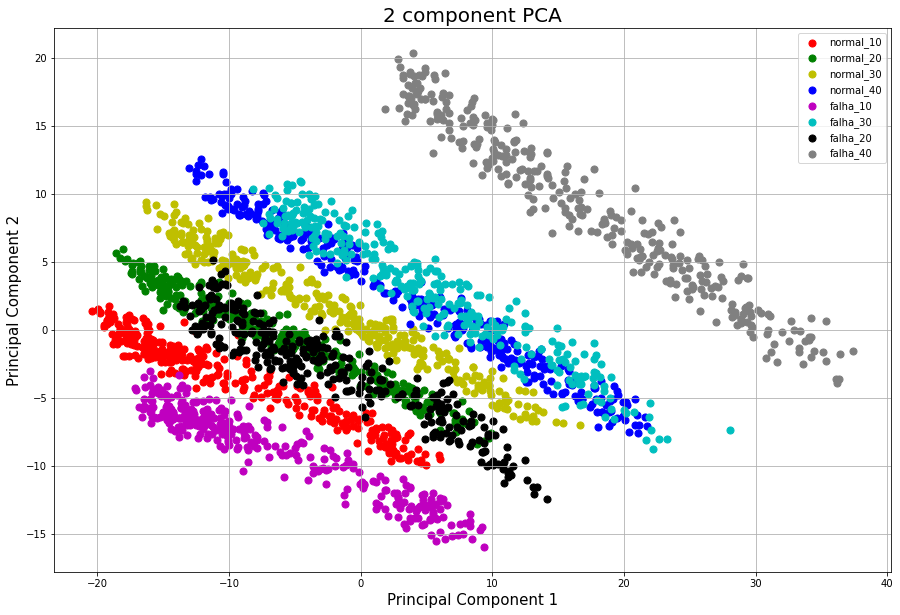

In [35]:
# Plot para verificar a capacidade de se distinguir as condições do motor baseado em apenas 2 componentes
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['normal_10','normal_20','normal_30','normal_40','falha_10','falha_30','falha_20', 'falha_40']
colors = ['r', 'g','y','b','m','c','k','gray']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['output'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [36]:
# Quantidade de informação explicada do  dataset com 2 componentes
pca.explained_variance_ratio_

array([0.03319878, 0.01034241])

In [37]:
pca.explained_variance_ratio_.sum()*100

4.354118276542423

In [38]:
# Observa-se que com 2000 componenetes conseguem explicar mais de 97% da informação contida no dataset.
pca = PCA(n_components=2000)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
pca.explained_variance_ratio_.sum()*100

97.18439820111749

In [39]:
finalDf = pd.concat([principalDf, output_fft[['output']].reset_index(drop=True)], axis = 1)
finalDf

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,output
0,9.142893,-0.817878,-1.890067,-2.356864,-7.896869,-1.161936,-0.386201,1.514467,4.558370,-0.378911,...,-0.581141,0.562706,0.427492,0.604585,0.254808,-0.165221,-1.341301,0.337796,-0.736601,normal_40
1,0.994661,3.338041,-2.583920,-3.072999,-7.063367,-2.893505,-1.816720,0.849182,5.470429,-1.182451,...,-0.360563,0.020373,0.086074,0.048287,0.347062,0.854788,0.268031,-0.534763,-0.442362,normal_40
2,-6.560750,7.848312,-2.761610,-2.957417,-6.020147,-1.974810,-2.940523,2.022769,4.745836,-0.949682,...,-0.324525,-0.439880,0.674683,0.059876,-0.490987,-0.046064,0.022552,0.896071,0.357043,normal_40
3,-10.119414,10.009460,-3.173316,-3.991821,-7.711816,-2.217958,-1.846376,0.678794,7.537357,-1.411030,...,-0.383159,-0.909391,0.168550,0.903103,-0.029313,-0.235423,1.321726,0.353508,0.249854,normal_40
4,-1.467940,4.470131,-2.693323,-3.735777,-7.020117,-1.061934,-3.057612,1.234204,6.532112,-2.496545,...,0.248515,0.409787,-0.211393,-0.157683,-0.748833,0.790934,0.223795,-1.075722,0.396332,normal_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,11.867462,-1.091544,10.098496,9.863719,3.037620,-1.091683,-3.901523,-6.333289,-1.068426,-0.366652,...,-0.833403,0.799383,-0.014381,1.193777,0.066024,-0.159910,0.195249,0.235783,-0.483723,falha_30
2564,5.545396,3.399602,4.794934,10.940432,3.694138,3.538267,-3.611879,8.705847,-1.783038,-0.099484,...,0.840787,0.468382,0.570808,-0.408320,-0.467545,-0.721287,0.375201,-0.215929,-0.375934,falha_30
2565,2.755040,3.554751,10.705041,9.927649,4.001658,-2.441734,0.004790,-12.557563,-0.139460,2.146004,...,0.119065,-0.010722,-0.051606,0.772826,-0.611792,0.485514,0.292233,0.127772,0.038626,falha_30
2566,-3.721993,9.583040,4.975076,11.263769,5.201683,2.422834,-8.972975,9.789255,-1.189919,-1.865432,...,0.894739,-0.555451,-0.483806,-0.127092,0.146653,-0.322758,-0.466922,0.611281,0.423416,falha_30


In [40]:
# criando colunas dummies, onde a presença do valor 1 significa o rótulos dos dados.
finalDf = pd.get_dummies(finalDf)
finalDf

,0,1,2,3,4,5,6,7,8,9,...,1998,1999,output_falha_10,output_falha_20,output_falha_30,output_falha_40,output_normal_10,output_normal_20,output_normal_30,output_normal_40
0,9.142893,-0.817878,-1.890067,-2.356864,-7.896869,-1.161936,-0.386201,1.514467,4.558370,-0.378911,...,0.337796,-0.736601,0,0,0,0,0,0,0,1
1,0.994661,3.338041,-2.583920,-3.072999,-7.063367,-2.893505,-1.816720,0.849182,5.470429,-1.182451,...,-0.534763,-0.442362,0,0,0,0,0,0,0,1
2,-6.560750,7.848312,-2.761610,-2.957417,-6.020147,-1.974810,-2.940523,2.022769,4.745836,-0.949682,...,0.896071,0.357043,0,0,0,0,0,0,0,1
3,-10.119414,10.009460,-3.173316,-3.991821,-7.711816,-2.217958,-1.846376,0.678794,7.537357,-1.411030,...,0.353508,0.249854,0,0,0,0,0,0,0,1
4,-1.467940,4.470131,-2.693323,-3.735777,-7.020117,-1.061934,-3.057612,1.234204,6.532112,-2.496545,...,-1.075722,0.396332,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,11.867462,-1.091544,10.098496,9.863719,3.037620,-1.091683,-3.901523,-6.333289,-1.068426,-0.366652,...,0.235783,-0.483723,0,0,1,0,0,0,0,0
2564,5.545396,3.399602,4.794934,10.940432,3.694138,3.538267,-3.611879,8.705847,-1.783038,-0.099484,...,-0.215929,-0.375934,0,0,1,0,0,0,0,0
2565,2.755040,3.554751,10.705041,9.927649,4.001658,-2.441734,0.004790,-12.557563,-0.139460,2.146004,...,0.127772,0.038626,0,0,1,0,0,0,0,0
2566,-3.721993,9.583040,4.975076,11.263769,5.201683,2.422834,-8.972975,9.789255,-1.189919,-1.865432,...,0.611281,0.423416,0,0,1,0,0,0,0,0
